In [11]:
import yfinance as yf
from src.TimeSeries import TimeSeries
from src.TimeSeriesPlot import TimeSeriesPlot
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [12]:
# Descargar precios de MELI
meli = yf.download('MELI', start='2022-01-01', period='1d')
dates = meli.index
meli_prices = meli['Close']['MELI']
meli_high = meli['High']['MELI']
meli_low = meli['Low']['MELI']
meli_open = meli['Open']['MELI']

[*********************100%***********************]  1 of 1 completed


Una serie temporal es ...

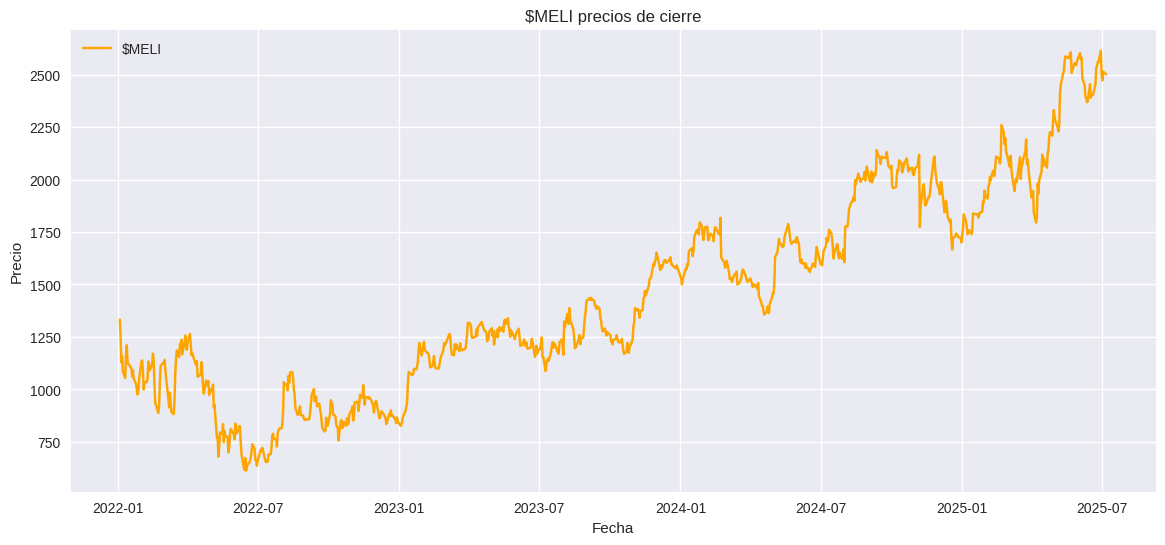

In [13]:
ts = TimeSeries('$MELI', dates, meli_prices, meli_open, meli_high, meli_low)

plot = TimeSeriesPlot(ts)
plot.add_original()
plot.add_grid()
plot.set_title('$MELI precios de cierre')
plot.show()

Este gráfico presenta los precios del stock de MercadoLibre a lo largo del tiempo.

## Filtros

Las EMAS son...  (explicar Moving Average y Exp.MA)

Poner formulitas.

Las EMAS se usan como soporte y para visualizar tendencias ...

Cruces de EMAS

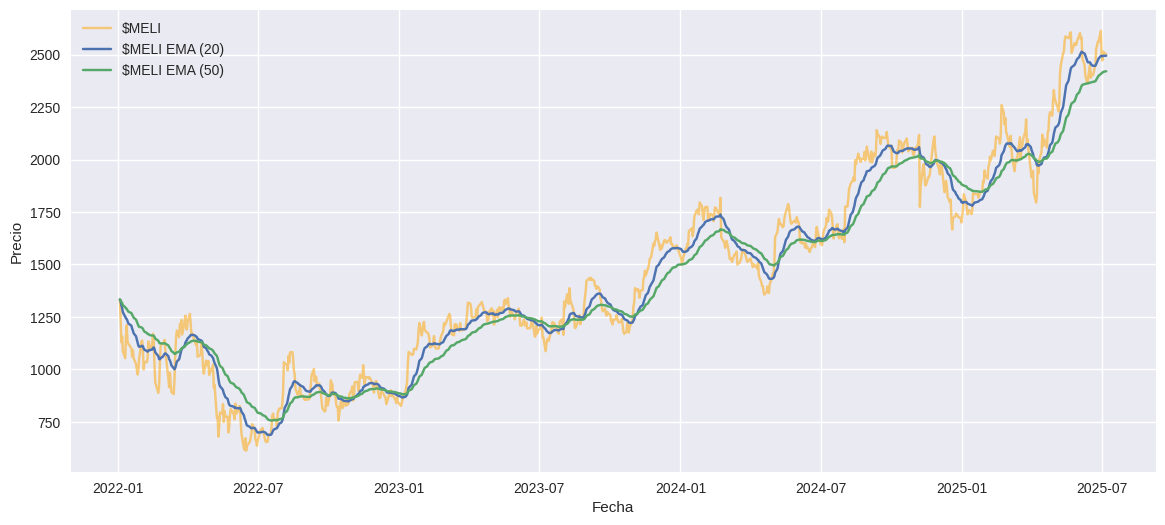

In [14]:
plot = TimeSeriesPlot(ts)
plot.add_original(alpha=0.5)
plot.add_ema(20)
plot.add_ema(50)
plot.add_grid()
plot.show()

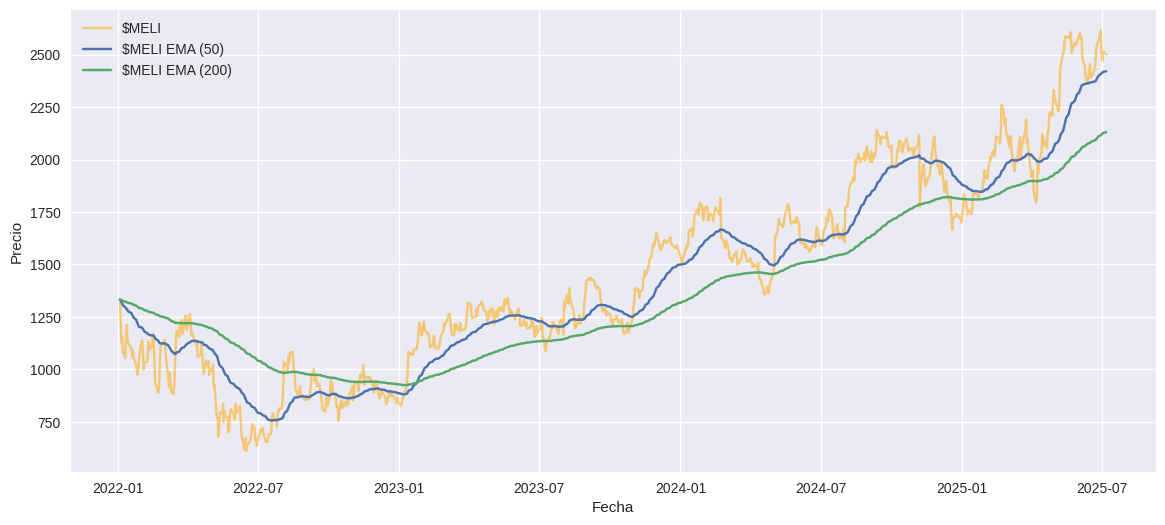

In [15]:
plot = TimeSeriesPlot(ts)
plot.add_original(alpha=0.5)
plot.add_ema(50)
plot.add_ema(200)
plot.add_grid()
plot.show()

## Estacionalidad de la serie

In [16]:
ts.is_stationary()

ADF Statistic: -0.368264339750965
p-value: 0.9152641770914982

KPSS Statistic: 0.3523799754969793
p-value: 0.01

Decisión: No estacionaria


False

In [17]:
ts_detrended = ts.detrend_with_regression_fitting(2)
ts_detrended.is_stationary()

ADF Statistic: -4.428877753993894
p-value: 0.00026378429579978927

KPSS Statistic: 0.12958163378327772
p-value: 0.08040438188281902

Decisión: Estacionaria


True

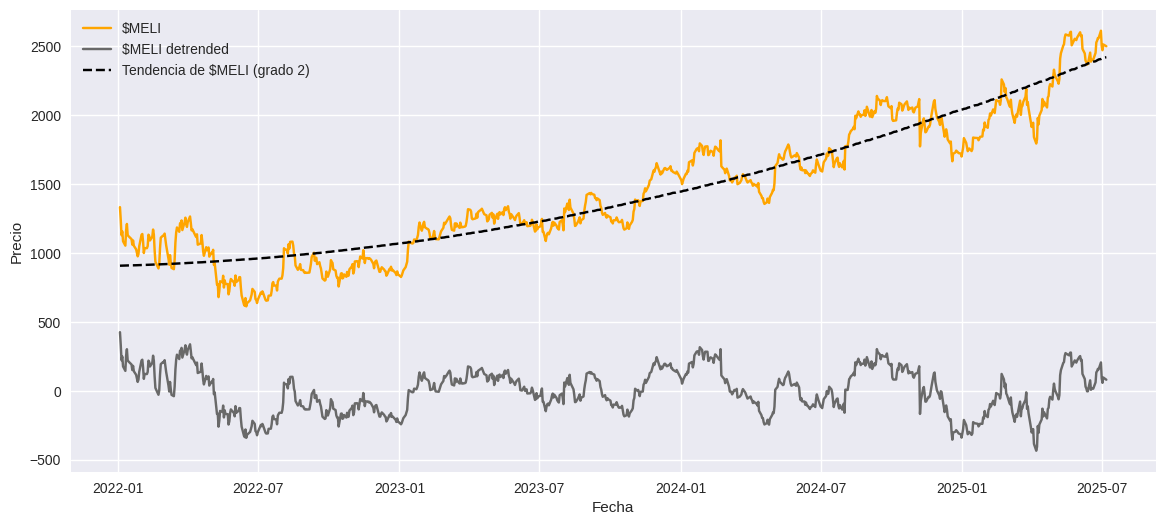

In [18]:
plot = TimeSeriesPlot(ts)
plot.add_original()
plot.add_detrended(2)
plot.add_tendency(2)
plot.show()

La serie original no es estacionaria. Lo mostramos con el test...

Una forma de hacer estacionaria una serie es quitándole el trend (que en este caso es la principal componente que le agrega no-estacionalidad).

Al hacerla, podemos ver la serie resultante, que cumple el test de estacionalidad. Chusmear utilidades de esto...

Algo que se ve bien en la estacionalidad es la fluctuación entre -500 y 500 en este caso (en otros precios pueden ser mucho mas volatiles, como TSLA)

## Filtros de frecuencia

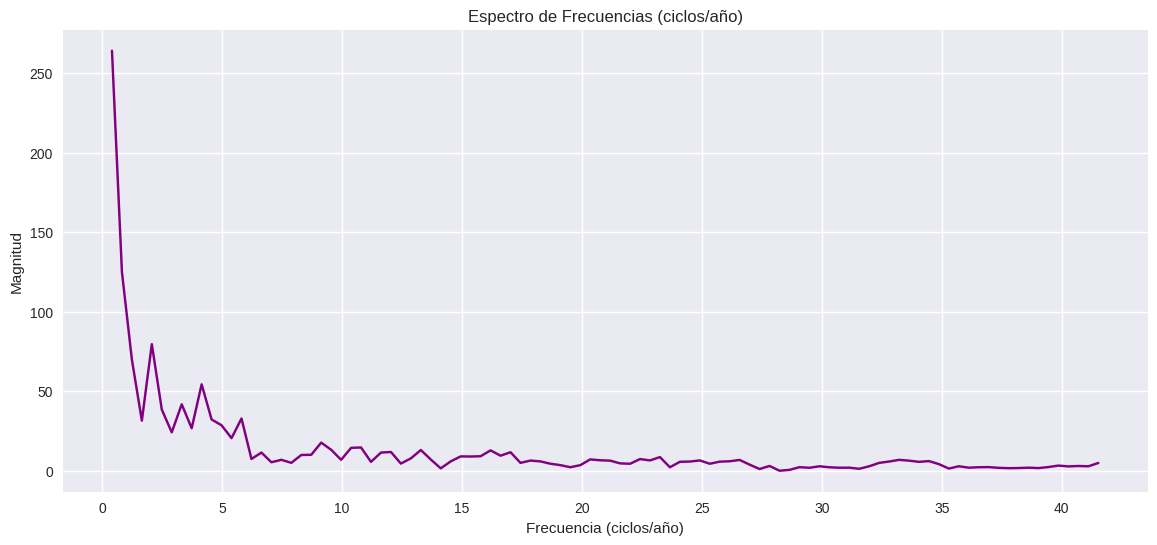

In [23]:
plot = TimeSeriesPlot(ts)
plot.add_yearly_frequency_spectrum(50, 5, on_detrended=False)
plot.show()

Aca esta bueno mostrar la diferencia de espectro de frecuencia entre la serie estacionaria y no estacionaria (muestra el pico en 0 por su trend, conocido en señales como componente DC).

Se puede ver también el ruido (altas frecuencais a partir de 10 aprox)

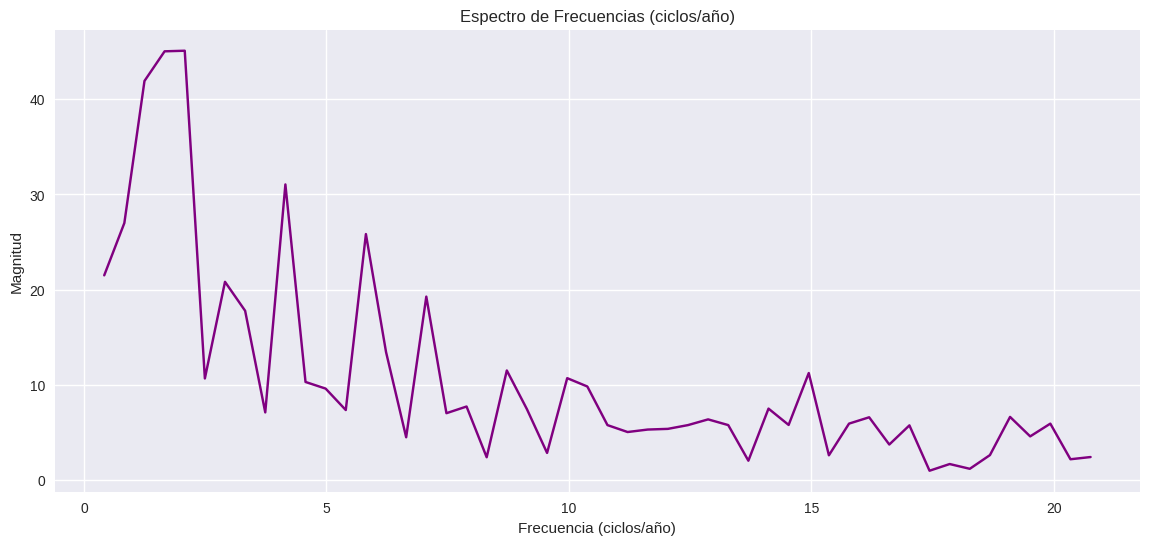

In [24]:
plot = TimeSeriesPlot(ts)
plot.add_yearly_frequency_spectrum(50, 5, on_detrended=True)
plot.show()

Chusmear posibles aplicaciones de ver frecuencia en finanzas

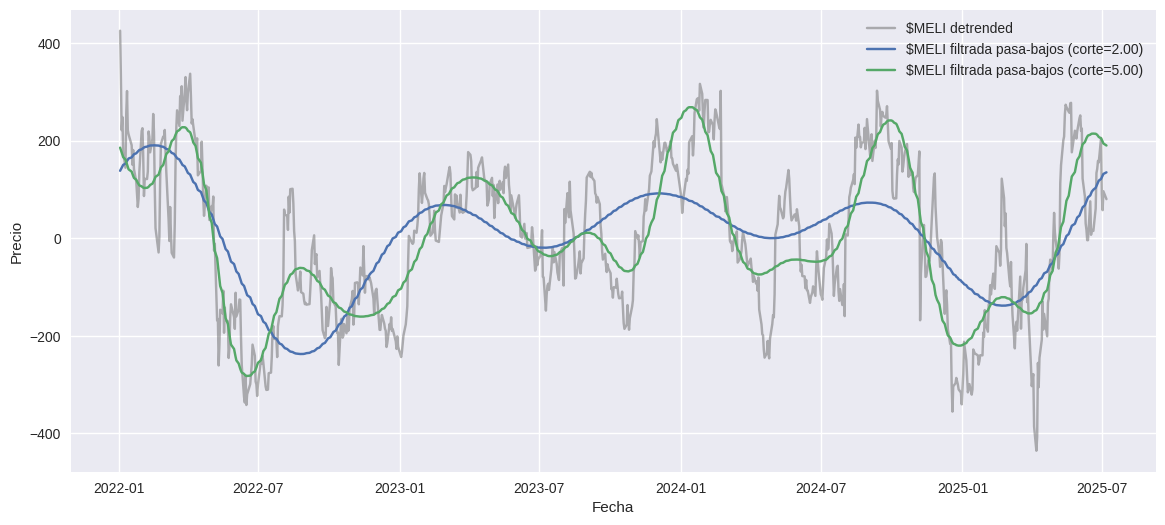

In [25]:
plot = TimeSeriesPlot(ts)
plot.add_detrended(2, alpha=0.5)
plot.add_low_pass_filtered(2)
plot.add_low_pass_filtered(5)
plot.show()

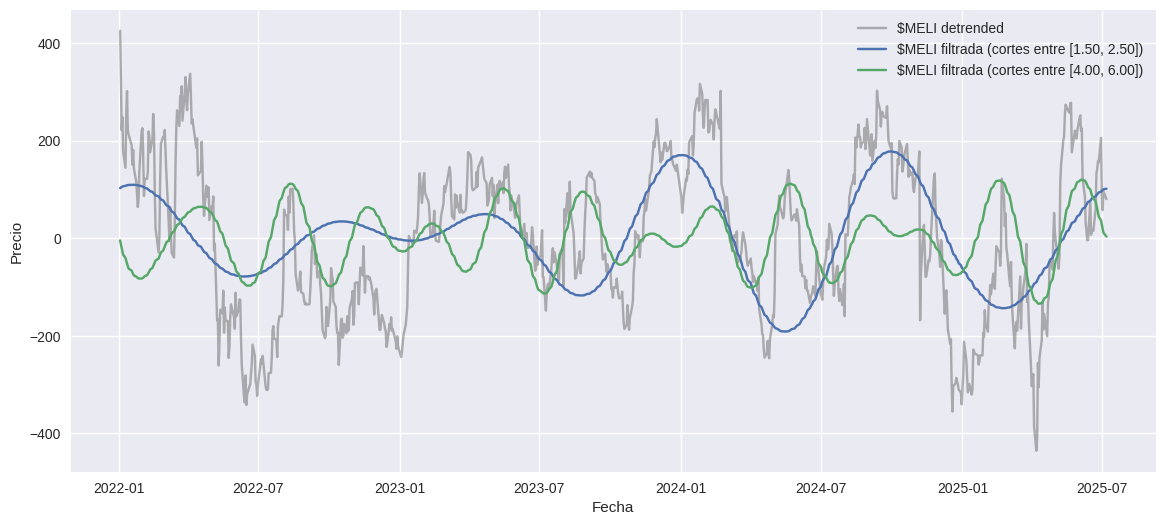

In [27]:
plot = TimeSeriesPlot(ts)
plot.add_detrended(2, alpha=0.5)
plot.add_band_pass_filtered(1.5, 2.5)
plot.add_band_pass_filtered(4, 6)
plot.show()

Aca hablar/comparar Moving Averages con Filtros de frecuencia: aca estamos tomando frecuencias bajas, lo cual nos da resultados similares a las MA que, por ejemplo, filtran ruido intra-semanal

In [31]:
"""plot = TimeSeriesPlot(ts)
plot.add_detrended(2, alpha=0.5)
plot.add_low_pass_filtered(7)
plot.add_ema(20)
plot.show()"""

'plot = TimeSeriesPlot(ts)\nplot.add_detrended(2, alpha=0.5)\nplot.add_low_pass_filtered(7)\nplot.add_ema(20)\nplot.show()'

## Autocorrelación

In [48]:
# Descargar precios de MELI
mercadolibre = 'MELI'
nasdaq = '^IXIC'
date = '2020-01-01'
muestreo = '1mo' # semanal

meli = yf.download(mercadolibre, start=date, interval=muestreo)
dates = meli.index
meli_prices = meli['Close'][mercadolibre]
ts_meli = TimeSeries(f'{mercadolibre}', dates, meli_prices)
ts_meli_base100 = ts_meli.normalize_base100()

nasdaq_df = yf.download(nasdaq, start=date, interval=muestreo)
dates = nasdaq_df.index
nasdaq_prices = nasdaq_df['Close'][nasdaq]
ts_nasdaq = TimeSeries(f'{nasdaq}', dates, nasdaq_prices)
ts_nasdaq_base100 = ts_nasdaq.normalize_base100()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


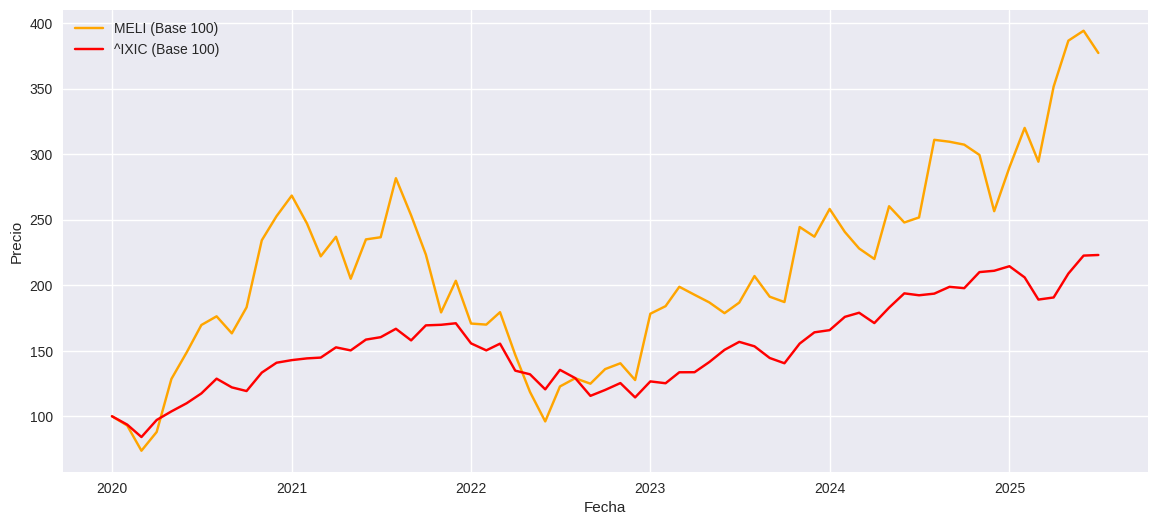

In [49]:
plot = TimeSeriesPlot(ts_meli_base100)
plot.add_original()
plot.add_another(ts_nasdaq_base100)
plot.show()

Aca hablar de cómo el índice del NASDAQ es más "suavizado", al ser mas robusto no va a fluctuar tanto como el precio de una sola empresa.

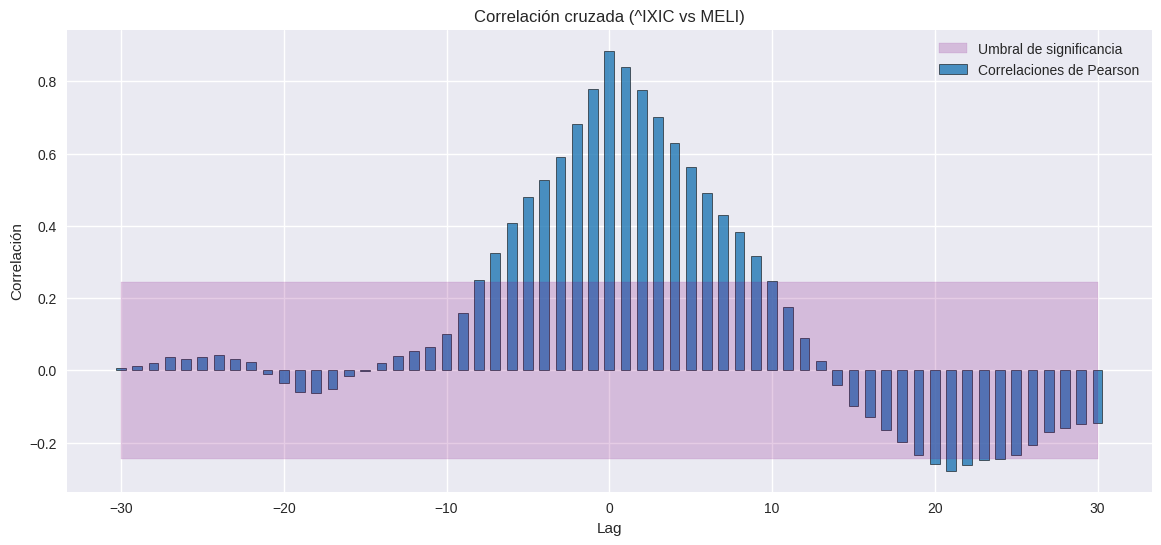

In [50]:
plot = TimeSeriesPlot(ts_nasdaq)
plot.add_cross_correlation_plot(ts_meli, 30)

MELI y Nasdaq están fuertemente correlacionadas (aprox 0.9).


## Forecasting